# Analyzing Output of Intermediate (FC) Layer
This notebook analyzes the output of the fully-connected (FC) layer prior to the output layer of a DQN (specifically, ../experiments/radial_maze_2/trial_2/params/weights_epoch50.dump). The data was obtained from

## max_values: which nodes were activated

In [1]:
import numpy as np

In [2]:
max_values_file = "../experiments/radial_maze_2/trial_2/results/epoch_50/max_values.npy"
max_states_file = "../experiments/radial_maze_2/trial_2/results/epoch_50/max_states.npy"
max_positions_file = "../experiments/radial_maze_2/trial_2/results/epoch_50/max_positions.npy"

max_values = np.load(max_values_file)
max_states = np.load(max_states_file)
max_positions = np.load(max_positions_file)

print("max_values shape: ", max_values.shape)
print("max_states shape: ", max_states.shape)
print("max_positions shape: ", max_positions.shape)

max_values shape:  (4608, 8)
max_states shape:  (4608, 8, 3, 60, 108)
max_positions shape:  (4608, 8, 4)


In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import random

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

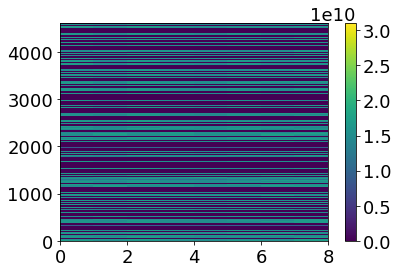

In [4]:
heatmap = plt.pcolor(max_values)
plt.colorbar(heatmap)
plt.show()

In [5]:
num_activated = np.sum(np.amax(max_values, axis=1) > 0.0)
num_total = max_values.shape[0]
frac_activated = float(num_activated) / float(num_total)
print("Fraction of nodes activated: %f" % frac_activated)

Fraction of nodes activated: 0.487630


## max_states: which images best activated particular nodes

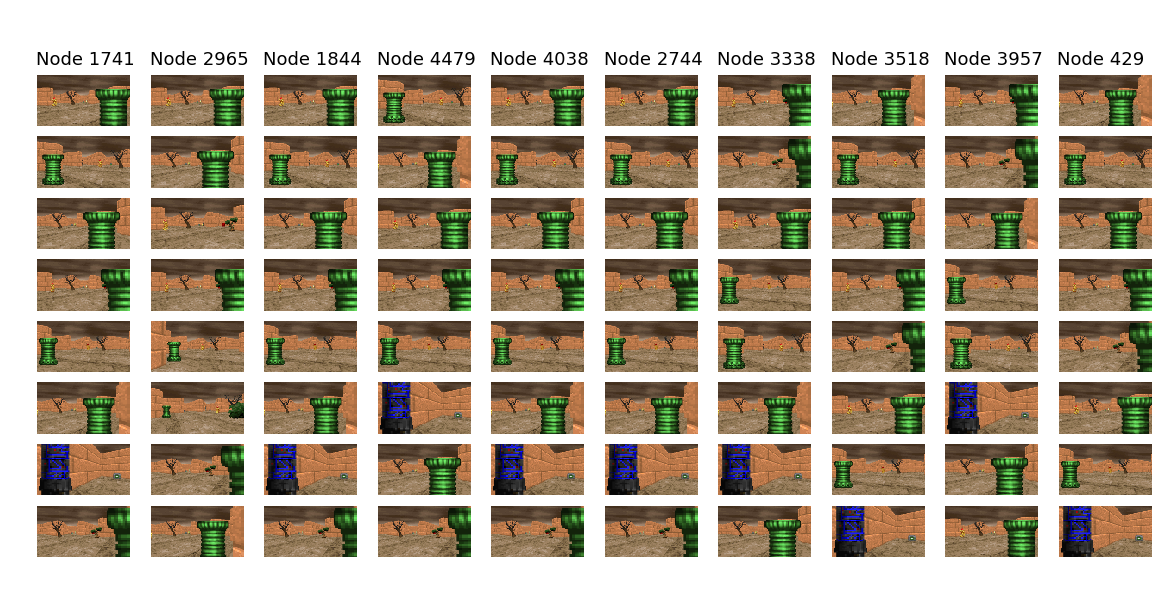

In [8]:
# Initial setup
sample_size = 10 # number of randomly sampled nodes
k = 8            # top k max states stored per node 
activated_nodes = np.argwhere(np.amax(max_values, axis=1)) # nonzero nodes
ids = np.random.choice(np.squeeze(activated_nodes), 
                       size=sample_size, replace=False) # random sample
fig, axes = plt.subplots(nrows=k+1, ncols=sample_size, figsize=(20, 10))
images = np.zeros([k, 60, 108, 3]) # [k, res_y, res_x, channels]

for col, idx in zip(range(sample_size), ids):
    # Title column with node number
    title = "Node " + str(idx)
    axes[0, col].text(0, 0, title)
    axes[0, col].axis('off')
    
    # Grab k max states for node idx and plot one in each row
    images = np.transpose(max_states[idx], [0, 2, 3, 1]) # [8, 3, 60, 108] to [8, 60, 108, 3]
    images = images[:, :, :, [2, 1, 0]] # BGR to RGB
    for i in range(1, k+1):
        image = images[i-1] 
        im = axes[i, col].imshow(image)
        axes[i, col].axis('off')

plt.show()

Clearly, the tall green pillar and tech column represented local minima to which many nodes converged.

## max_positions: which positions corresponded to nodes at max activation

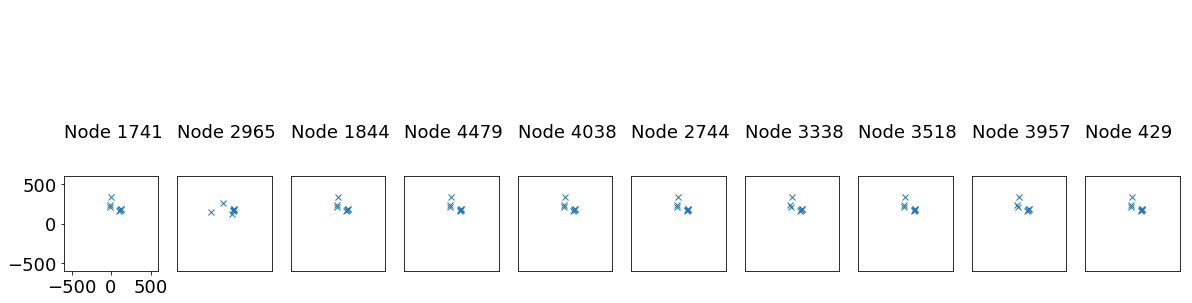

In [9]:
# Initial setup
sample_size = 10 # number of randomly sampled nodes
k = 8            # top k max states stored per node 
#activated_nodes = np.argwhere(np.amax(max_values, axis=1)) # nonzero nodes
#ids = np.random.choice(np.squeeze(activated_nodes), 
#                       size=sample_size, replace=False) # random sample
fig, axes = plt.subplots(nrows=2, ncols=sample_size, figsize=(20, 5))
pos = np.zeros([k, 4]) # [k, [timestamp, pos_x, pos_y, pos_z]]

for col, idx in zip(range(sample_size), ids):
    # Title column with node number
    title = "Node " + str(idx)
    axes[0, col].text(0, 0, title)
    axes[0, col].axis('off')
       
    # Set axis limits
    axes[1, col].set_xbound(lower=-600, upper=600)
    axes[1, col].set_ybound(lower=-600, upper=600)
    axes[1, col].set_aspect('equal')
    if col > 0:
        axes[1, col].set_xticks([])
        axes[1, col].set_yticks([])
        
    # Grab k max positions for node idx and plot on graph
    pos = max_positions[idx]
    axes[1, col].plot(pos[:, 1], pos[:, 2], 'x', scalex=False, scaley=False)  
    
plt.show()